In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import RegressionResultsWrapper
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
advertising_df = pd.read_csv('datasets/Advertising.csv', index_col=0)

In [5]:
advertising_df.loc[0:4]

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5

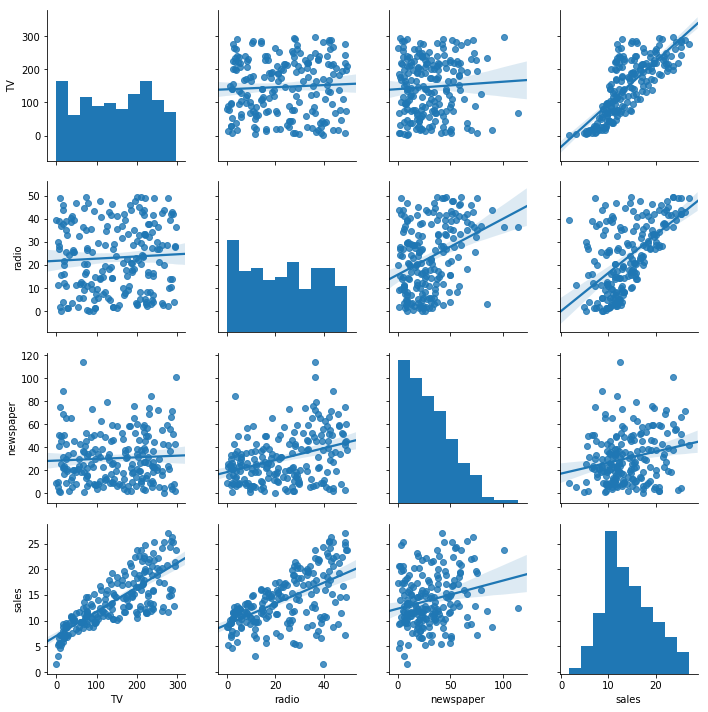

In [6]:
sns.pairplot(data=advertising_df,kind='reg')

In [7]:
mod = ols(formula='sales ~ TV', data=advertising_df)
res = mod.fit()
print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: sales            AIC:                1042.0913
Date:               2018-08-17 18:53 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Pro

Esto dice que el intervalo de confianza del 95 % de $\beta_{0}$ es [6.130       7.935] lo que quiere decir que en ausencia de propaganda en TV las ventas se encontraran en ese intervalo.
Tambien dice que el intervalo de confianza del 95 % para $\beta_{1}$ es [0.042       0.053] lo que quiere decir que invirtiendo $1000 en TV se puede ganar entre [42,53] en ventas.

In [8]:
res.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p_values son bajisimos con lo cual se rechaza la hipotesis nula que los coheficientes son cero por la hipotesis alternativa que los coheficientes son distintos de cero.

In [9]:
sqrt(res.mse_total)

5.217456565710478

In [10]:
mod = ols(formula='sales ~ TV + radio + newspaper', data=advertising_df)
res = mod.fit()
print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2018-08-17 18:53 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
--------------------

# Ejercicios

3) Suppose we have a data set with five predictors, X1 =GPA, X2 = IQ,
X3 = Gender (1 for Female and 0 forMale), X4 = Interaction between
GPA and IQ, and X5 = Interaction between GPA and Gender. The
response is starting salary after graduation (in thousands of dollars).
Suppose we use least squares to fit the model, and get ˆβ0 = 50, ˆβ1 =
20, ˆβ2 = 0.07, ˆβ3 = 35, ˆβ4 = 0.01, ˆβ5 = −10.

la funcion de regresion queda:

If Female

$50 + 20*GPA + 0.07*IQ + 35 + 0.01*GPA*IQ - 10*GPA $

If Male

$50 + 20*GPA + 0.07*IQ + 0.01*GPA*IQ $


i) For a fixed value of IQ and GPA, males earn more on average
than females. It's false because depends on GPA values.
GPA values goes from 0 to 5 if GPA > 3.5 Males earns more on average than Female otherwise Female earns more than Male

iii) For a fixed value of IQ and GPA, males earn more on average
than females provided that the GPA is high enough. It's true.

True or false: Since the coefficient for the GPA/IQ interaction
term is very small, there is very little evidence of an interaction
effect. Justify your answer.

Es falso, depende del valor del p_value.

4) I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y =
β0 + β1X + β2X2 + β3X3 + epsilon.


(a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + epsilon. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.

Para poder comparar los RSS es necesario saber cuales son los datos. Pero suponiendo la verdadera relacion es lineal y tengo la suficiente cantidad de ejemplos 100, entonces esperaria que RSS lineal es menor que el RSS del modelo cubico.

(b) Answer (a) using test rather than training RSS.
NO hay suficiente informacion pero esperaria que el lineal sea menor que el cubico porque el modelo cubico es mas complejo y tiene mas variance dando mayor error.




In [11]:
mod = ols(formula='sales ~ newspaper', data=advertising_df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 17 Aug 2018   Prob (F-statistic):            0.00115
Time:                        18:53:41   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [12]:
advertising_df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

Haciendo regresion de sales sobre newspaper se que newspaper tiene influencia sobre sales, pero haciendo regresion sobre todas las variables se ve que tiene poca influencia.

correlation between radio and newspaper is 0.35. This reveals a
tendency to spend more on newspaper advertising in markets where more
is spent on radio advertising

Consider an absurd example to illustrate the point. Running
a regression of shark attacks versus ice cream sales for data collected at
a given beach community over a period of time would show a positive
relationship, similar to that seen between sales and newspaper. Of course
no one (yet) has suggested that ice creams should be banned at beaches
to reduce shark attacks. In reality, higher temperatures cause more people
to visit the beach, which in turn results in more ice cream sales and more
shark attacks. A multiple regression of attacks versus ice cream sales and
temperature reveals that, as intuition implies, the former predictor is no
longer significant after adjusting for temperature.

In [13]:
mod = ols(formula='sales ~ TV + radio', data=advertising_df)
simple_model_fit = mod.fit()
print(simple_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 17 Aug 2018   Prob (F-statistic):           4.83e-98
Time:                        18:53:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [14]:
mod = ols(formula='sales ~ TV + radio + TV*radio', data=advertising_df)
complex_model_fit = mod.fit()
print(complex_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 17 Aug 2018   Prob (F-statistic):          6.68e-146
Time:                        18:53:45   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [15]:
statsmodels.regression.linear_model.RegressionResultsWrapper?

Object `statsmodels.regression.linear_model.RegressionResultsWrapper` not found.


In [16]:
simple_model_fit.mse_model

2430.117384966191

In [17]:
complex_model_fit.mse_model

1747.5551224574244

In [18]:
def plot_linear_regression_surface(advertising_df, model_fit):
    x_surf, y_surf = np.meshgrid(np.linspace(advertising_df.TV.min(), advertising_df.TV.max(), 100),np.linspace(advertising_df.radio.min(), advertising_df.radio.max(), 100))
    onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
    fittedY=model_fit.predict(exog=onlyX).as_matrix()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(advertising_df['TV'],advertising_df['radio'],advertising_df['sales'],c='red', marker='o')
    ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), alpha=0.5)
    ax.set_xlabel('TV')
    ax.set_ylabel('Radio')
    ax.set_zlabel('Sales')
    plt.show()

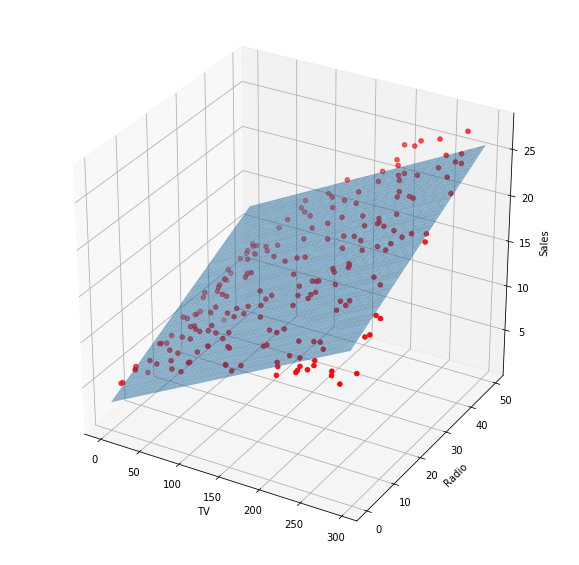

In [19]:
plot_linear_regression_surface(advertising_df,simple_model_fit)

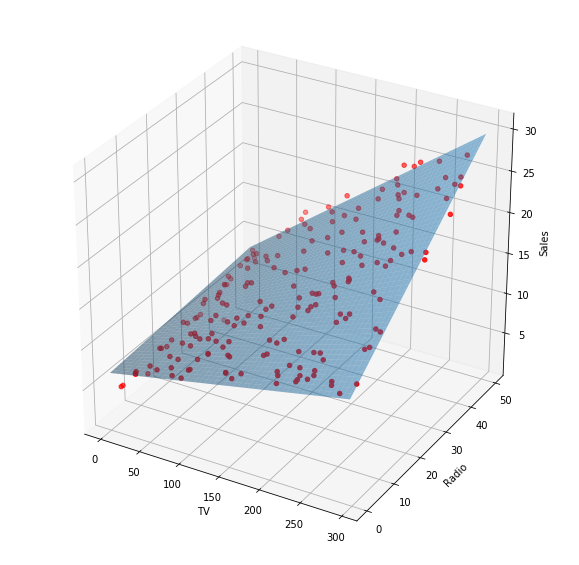

In [20]:
plot_linear_regression_surface(advertising_df,complex_model_fit)

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [26]:
def plotly_linear_regression_surface(advertising_df, model):

    x_surf, y_surf = np.meshgrid(
        np.linspace(advertising_df.TV.min(), advertising_df.TV.max(), 100),
        np.linspace(advertising_df.radio.min(), advertising_df.radio.max(), 100)
    )

    onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
    fittedY=model.predict(exog=onlyX).as_matrix()
    data = [
        go.Surface(x=x_surf, y=y_surf, z=fittedY.reshape(x_surf.shape)),
        go.Scatter3d(
            x=advertising_df['TV'],
            y=advertising_df['radio'], 
            z=advertising_df['sales'],
            mode='markers',
            marker=dict(
                color='red',
                size=3,
                symbol='circle',
                opacity=0.9
            )
        )
    ]
    layout = go.Layout(
        title='Linear regression surface of sales - TV + radio + TV*radio',
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [27]:
plotly_linear_regression_surface(advertising_df,complex_model_fit)

In [128]:
plotly_linear_regression_surface(advertising_df,simple_model_fit)

This image suggests that there is interaction between Tv and radio in the advertising data. Notice that when levels of either TV or radio are low, then the true sales are lower than predicted by the linear model. But when advertising is split between the two media, then the model tends to underestimate sales

The standard linear regression model has two important assumptions state that the relationship between the
predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor Xj on the response Y is independent of the values of the other predictors. The linear assumption
states that the change in the response Y due to a one-unit change in Xj is
constant, regardless of the value of Xj.

In [143]:
credit_df = pd.read_csv('datasets/Credit.csv', index_col=0)

In [144]:
credit_df.iloc[:4]

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1   14.891   3606     283      2   34         11    Male      No     Yes   
2  106.025   6645     483      3   82         15  Female     Yes     Yes   
3  104.593   7075     514      4   71         11    Male      No      No   
4  148.924   9504     681      3   36         11  Female      No      No   

   Ethnicity  Balance  
1  Caucasian      333  
2      Asian      903  
3      Asian      580  
4      Asian      964

<IPython.core.display.Javascript object>


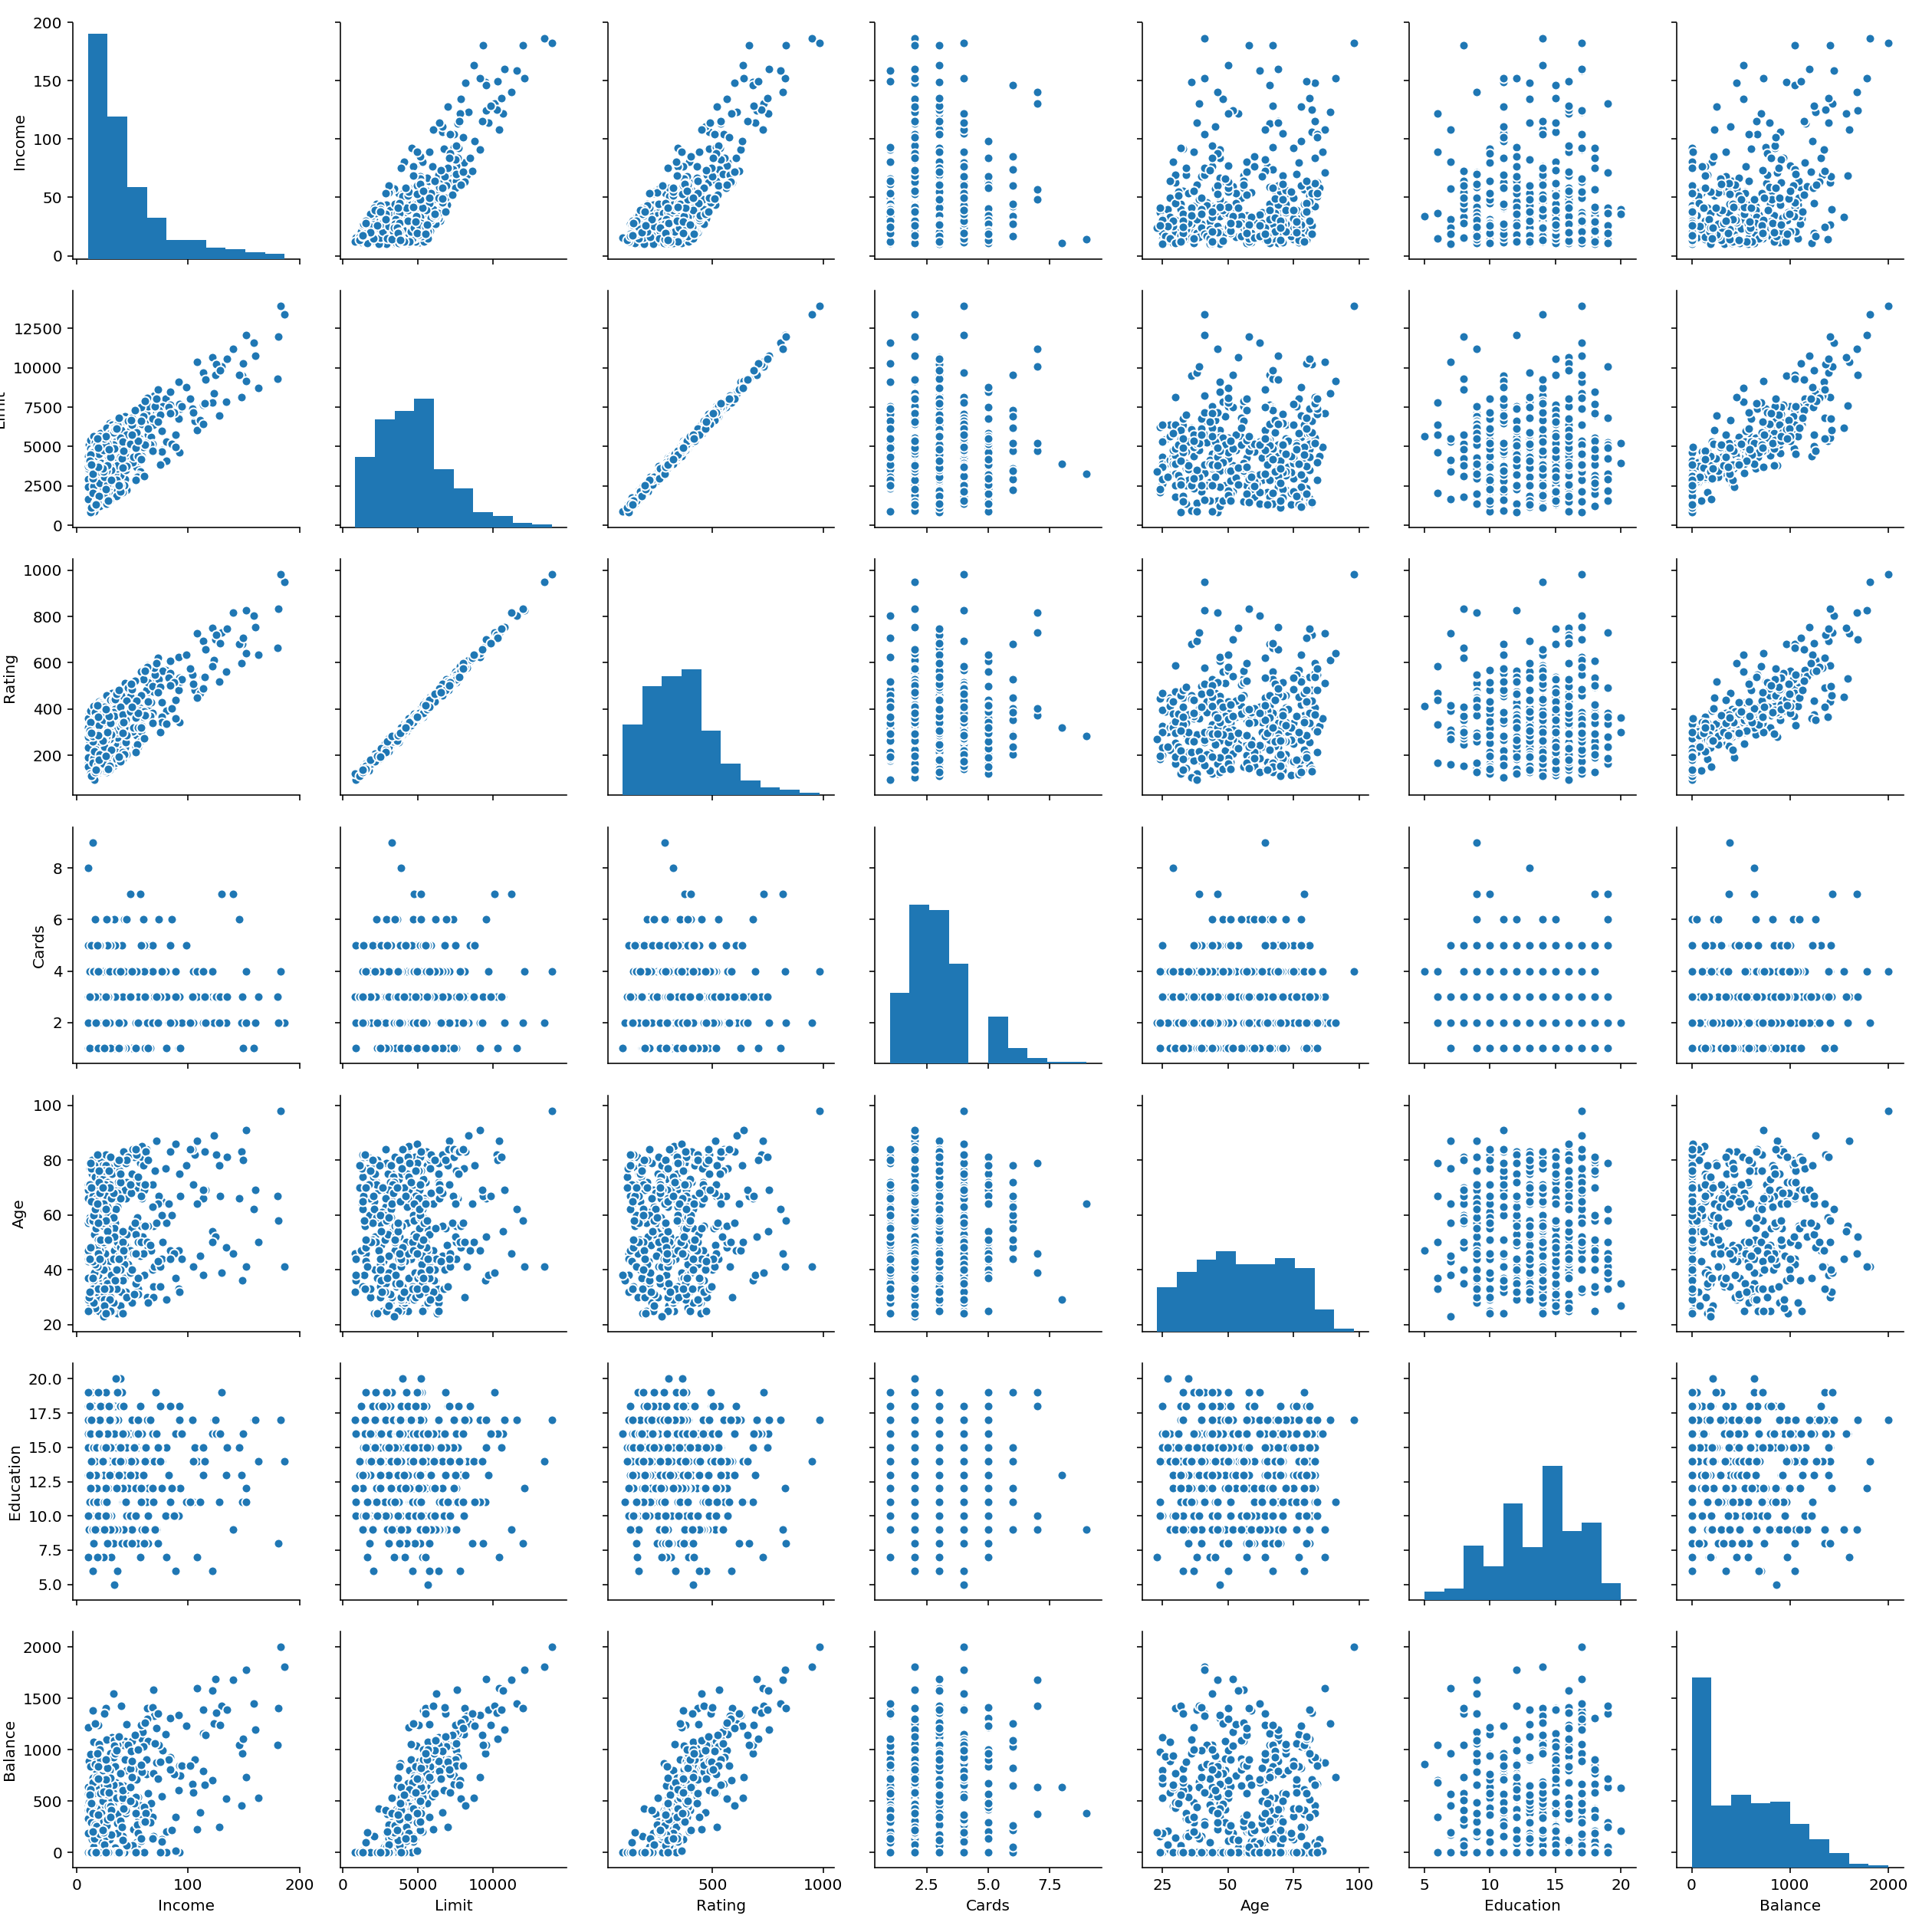

In [145]:
sns.pairplot(data=credit_df)

In [149]:
credit_model = ols(formula='Balance ~ Income + Student', data=credit_df)
credit_model_fit = credit_model.fit()
print(credit_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           9.64e-29
Time:                        03:39:53   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.

In [153]:
credit_model_inter = ols(formula='Balance ~ Income + Student + Student*Income', data=credit_df)
credit_model_inter_fit = credit_model_inter.fit()
print(credit_model_inter_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           4.94e-28
Time:                        03:54:55   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

In [287]:
auto_df = pd.read_csv('datasets/Auto.csv')

In [289]:
auto_df=auto_df[~(auto_df['horsepower'] == '?')]
auto_df['horsepower'] = auto_df['horsepower'].apply(pd.to_numeric)

In [290]:
auto_df.iloc[:4]

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst

In [291]:
lineal_auto_model =ols(formula='mpg ~ horsepower', data=auto_df)
lineal_auto_model= lineal_auto_model.fit()

In [356]:
cuadratic_auto_model = ols(formula='mpg ~ horsepower + I(horsepower**2)', data=auto_df)
cuadratic_auto_model = cuadratic_auto_model.fit()

In [363]:
quintic_auto_model = ols(formula='mpg ~ horsepower + I(horsepower**2) + I(horsepower**3) + I(horsepower**4) + I(horsepower**5)',data=auto_df)
quintic_auto_model = quintic_auto_model.fit()

In [364]:
x = pd.DataFrame({'horsepower':np.linspace(auto_df.horsepower.min(), auto_df.horsepower.max(), 100)})

In [365]:
y_lineal = lineal_auto_model.predict(exog=x)

In [366]:
y_cuadratic = cuadratic_auto_model.predict(exog=x)

In [367]:
y_quintic = quintic_auto_model.predict(exog=x)

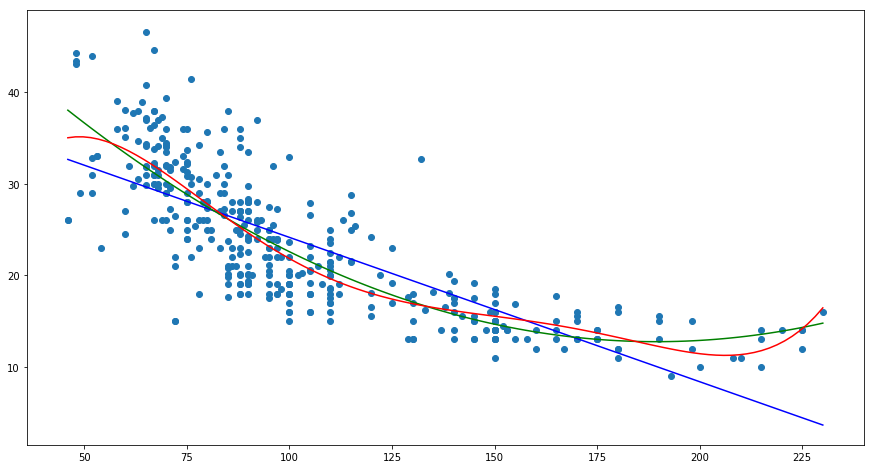

In [373]:
figure = plt.figure(figsize=(15,8))
plt.plot(x,y_lineal,color='blue')
plt.plot(x,y_cuadratic,color='green')
plt.scatter(x=auto_df.horsepower, y=auto_df.mpg)
plt.plot(x,y_quintic,color='red')

In [374]:
print(lineal_auto_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2018-08-15 12:26 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omn

In [375]:
print(cuadratic_auto_model.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.686    
Dependent Variable:  mpg              AIC:                2272.3535
Date:                2018-08-15 12:26 BIC:                2284.2673
No. Observations:    392              Log-Likelihood:     -1133.2  
Df Model:            2                F-statistic:        428.0    
Df Residuals:        389              Prob (F-statistic): 5.40e-99 
R-squared:           0.688            Scale:              19.131   
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          56.9001   1.8004  31.6037 0.0000 53.3603 60.4399
horsepower         -0.4662   0.0311 -14.9782 0.0000 -0.5274 -0.4050
I(horsepower ** 2)  0.0012   0.0001  10.0801 0.0000  0.0010  0.0015
------------------------------------------------------------------

In [376]:
print(quintic_auto_model.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.693    
Dependent Variable:   mpg              AIC:                2266.6634
Date:                 2018-08-15 12:27 BIC:                2290.4910
No. Observations:     392              Log-Likelihood:     -1127.3  
Df Model:             5                F-statistic:        177.4    
Df Residuals:         386              Prob (F-statistic): 1.16e-97 
R-squared:            0.697            Scale:              18.713   
--------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept          -32.2305  28.5740 -1.1280 0.2600 -88.4107 23.9497
horsepower           3.7001   1.3028  2.8400 0.0047   1.1386  6.2616
I(horsepower ** 2)  -0.0714   0.0225 -3.1702 0.0016  -0.1157 -0.0271
I(horsepower ** 3)   0.0006   0.0002  3.2057 0.0015  

# Non-linearity of the Data

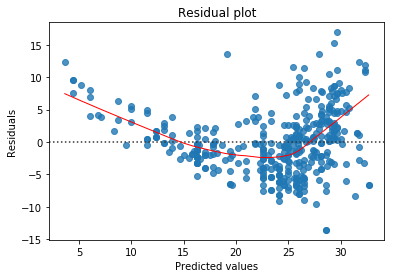

In [383]:
sns.residplot(lineal_auto_model.fittedvalues, auto_df.mpg, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

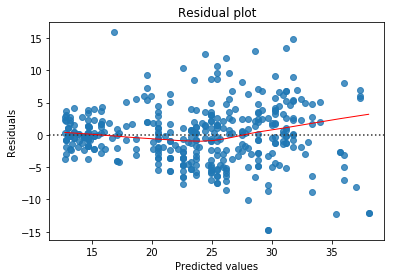

In [384]:
sns.residplot(cuadratic_auto_model.fittedvalues, auto_df.mpg, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

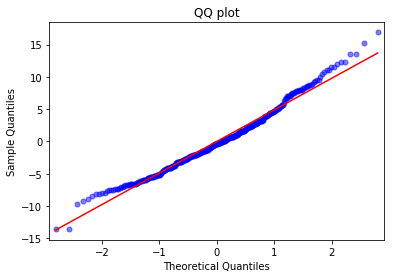

In [386]:
QQ = ProbPlot(lineal_auto_model.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

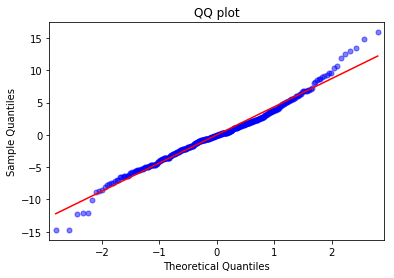

In [387]:
QQ = ProbPlot(cuadratic_auto_model.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');